In [5]:
import pandas as pd
import geopy
from tqdm import tqdm

In [3]:
records = pd.read_parquet('Data/data_qianhua.parquet.gzip', engine = 'pyarrow')

In [4]:
records.head()

,panelist_id,date,latitude,longitude,city,state,zip,prior_location_name,prior_brand,distance_traveled_m,...,brand,is_home,is_work,is_open,dist_from_work,dist_from_home,arrival_local,duration,duration_s_compute,departure_local
0,EMBUSA-1273679,2019-12-30,41.72157,-88.201710,Naperville,IL,60564-0000,Jewel/Osco Shopping Ctr-1,None,1215.153812,...,None,1.0,0.0,NaN,723034.2,0.000,2019-12-30 17:21:40.000000,88074.0,23899.0,2019-12-30 23:59:59.000000
1,EMBUSA-1273679,2019-12-31,41.72157,-88.201710,Naperville,IL,60564-0000,Jewel/Osco Shopping Ctr-1,None,0.000000,...,None,1.0,0.0,NaN,723034.2,0.000,2019-12-31 00:00:00.000000,88074.0,64174.0,2019-12-31 17:49:34.000000
2,EMBUSA-1273679,2019-12-31,41.79893,-88.124623,Naperville,IL,60563-0000,home,None,10718.133007,...,None,0.0,0.0,NaN,730236.6,10694.202,2019-12-31 18:15:05.000000,8057.0,8057.0,2019-12-31 20:29:22.000000
3,EMBUSA-1273679,2019-12-31,41.72157,-88.201710,Naperville,IL,60564-0000,non_poi,None,10718.133007,...,None,1.0,0.0,NaN,723034.2,0.000,2019-12-31 20:45:17.000000,53656.0,11682.0,2019-12-31 23:59:59.000000
4,EMBUSA-1273679,2020-01-01,41.72157,-88.201710,Naperville,IL,60564-0000,non_poi,None,0.000000,...,None,1.0,0.0,NaN,723034.2,0.000,2020-01-01 00:00:00.000000,53656.0,41973.0,2020-01-01 11:39:33.000000


In [13]:
geolocator = geopy.geocoders.Nominatim(user_agent = 'norah')

def state_county(row):
    coord = f"{row['latitude']}, {row['longitude']}"
    location = geolocator.reverse(coord)
    
    try:
        address = location.raw['address']
        state = address.get('state', None)
        county = address.get('county', None)
        row['state_'] = state
        row['county_'] = county
    
    except AttributeError:
        row['state_'] = None
        row['county_'] = None
    
    return row

In [12]:
tqdm.pandas()

records = records.progress_apply(state_county, axis = 1)

  0%|                                                                            | 2761/19287965 [24:11<2815:34:49,  1.90it/s]


KeyboardInterrupt: 

In [3]:
import glob
import os
import pandas as pd

In [79]:
csv_files = glob.glob(os.path.join('Data/trajectory', '*.csv'))
max_ = []
cases = []
for f in csv_files:
    df = pd.read_csv(f)
    max_.append(df['cases_avg_c'].max())
    cases = cases + list(df['cases_avg_c'])

In [80]:
import numpy as np
pd.DataFrame(cases).describe()

,0
count,515817.000000
mean,283.206825
std,975.296970
min,0.000000
25%,13.570000
50%,69.430000
75%,222.570000
max,41682.000000


In [30]:
X = np.array([0] * 150 + [10 * (1+0.1)**i for i in range(100)] + [10 * 1.1** 100 * (1 - 0.05)**i for i in range(100)] + [10 * 1.1  ** 100 * 0.95 ** 100] * 250)/1000

In [42]:
((1 - 3.5)**2 + (6 - 3.5)**2)**0.5

3.5355339059327378

In [41]:
np.std(np.array([1, 6]))()

2.5

In [15]:
import matplotlib.pyplot as plt
import numpy as np
def HS_Curve(HDP, HGP, ac_seq):
    ls = [0]
    h = [0]
    for i in ac_seq:
        hs = (ls[-1] - ls[-1]*HDP + (1 - ls[-1]) * HGP * i)
        HS = np.array([0, hs])
        h.append(np.sqrt(np.sum((HS - np.mean(HS))**2)))
        ls.append(hs)
    plt.figure(figsize = (12, 5))
    plt.plot(ls)
    print('Maximum habit strength is {} with HDP = {} and HGP = {}'.format(ls[-1], HDP, HGP))
    return ls, h

Maximum habit strength is 0.5952380952380952 with HDP = 0.136 and HGP = 0.2


([0,
  0.2,
  0.33280000000000004,
  0.42097920000000005,
  0.47953018880000003,
  0.5184080453632,
  0.5442229421211648,
  0.5613640335684534,
  0.5727457182894531,
  0.5803031569441969,
  0.5853212962109466,
  0.5886533406840686,
  0.5908658182142216,
  0.5923349032942431,
  0.5933103757873774,
  0.5939580895228187,
  0.5943881714431516,
  0.5946737458382526,
  0.5948633672365997,
  0.5949892758451022,
  0.5950728791611478,
  0.5951283917630021,
  0.5951652521306334,
  0.5951897274147405,
  0.5952059790033877,
  0.5952167700582494,
  0.5952239353186776,
  0.595228693051602,
  0.5952318521862637,
  0.5952339498516792,
  0.595235342701515,
  0.5952362675538059,
  0.5952368816557272,
  0.5952372894194029,
  0.5952375601744836,
  0.595237739955857,
  0.5952378593306891,
  0.5952379385955775,
  0.5952379912274635,
  0.5952380261750357,
  0.5952380493802237,
  0.5952380647884685,
  0.5952380750195432,
  0.5952380818129767,
  0.5952380863238165,
  0.5952380893190141,
  0.5952380913078253,
 

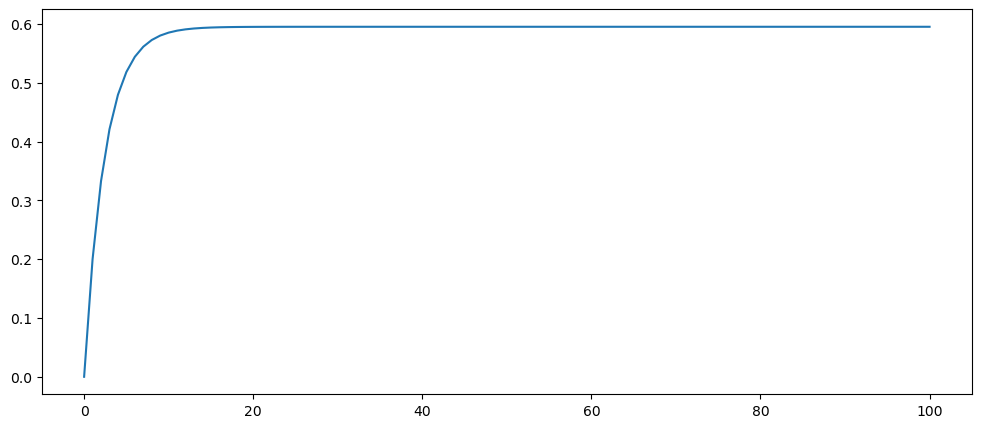

In [16]:
HS_Curve(0.136, 0.2, [1] * 100)

In [76]:
def estimate_range_of_commute_prob(HDP, HGP, X_min, X_max, b1, b0, wh, w0):
    
    HS_min, HS_max = 0, HGP / (HDP + HGP)
    
    # h = sqrt(sum((HS - mean(HS))**2))
    h_min, h_max = 0, np.std([HS_min, HS_max])*2**0.5
    
    # w = 1/(1 + exp(-wh * h + w0))
    w_min, w_max = 1/(1+np.exp(-wh * h_min + w0)), 1/(1+np.exp(-wh * h_max + w0))
    
    
    
    # U = b0 + b1 * X 
    # b1 is negative, indicating the negative impact of covid on utility
    # when covid cases is at the lowest, the utility of commuting reach max; when covid cases is the highest, the utility of commuting reach min
    Uc_min, Uc_max = b0 + b1 * X_max, b0 + b1 * X_min
    
    # D = w * HS + (1-w) * U
    # D reach the lowest when the highest weight is on the lowest between HS & U and the rest is on the lowest of the other, 
    # D reach the highest when the highest weight is on the highest between HS & U and the rest is on the highest of the other. 
    # if U_min < 0, Dc_min = U_min * w_max; else Dc_min = 0
    
    wu_min, wu_max = 1 - w_max, 1 - w_min
    Dc_min, Dc_max = min(HS_min, Uc_min) * w_max_ + max(HS_min, Uc_min) * (1 - w_max_), max(HS_max, Uc_max) * w_max_ + min(HS_max, Uc_max) * (1 - w_max_)
        
    Dnc_range = [0, HS_range[1] * w_range[1]]
    Dnc_c_range = [Dnc_range[0]-Dc_range[1], Dnc_range[1]-Dc_range[0]]
    
    Pc_range = [1/(1+np.exp(Dnc_c_range[1])), 1/(1+np.exp(Dnc_c_range[0]))]
    
    return dict(zip(['HS_range', "h_range", "w_range", "U_range", 'Dc_range', 'Dnc_range', 'Dnc_c_range', 'Pc_range'], [HS_range, h_range, w_range, U_range, Dc_range, Dnc_range, Dnc_c_range, Pc_range]))

In [87]:
estimate_range_of_commute_prob(0.5, 0.001, np.array([0, 417]), -0.06, 5, 20, 10)

{'HS_range': [0, 0.001996007984031936],
 'h_range': [0, 0.0014113907808114721],
 'w_range': [4.5397868702434395e-05, 4.669754879377742e-05],
 'U_range': [-20.02, 5.0],
 'Dc_range': [-0.0009348849268514239, 0.0002334877439688871],
 'Dnc_range': [0, 9.320868022710063e-08],
 'Dnc_c_range': [-0.0002334877439688871, 0.000934978135531651],
 'Pc_range': [0.49976625548314507, 0.500058371935727]}

In [86]:
estimate_range_of_commute_prob(0.5, 0.1, np.array([0, 417]), -0.0142, 1.5, 18, 15)

{'HS_range': [0, 0.16666666666666669],
 'h_range': [0, 0.11785113019775795],
 'w_range': [3.059022269256247e-07, 2.5518749146500977e-06],
 'U_range': [-4.4214, 1.5],
 'Dc_range': [-1.1282859747633942e-05, 3.827812371975147e-06],
 'Dnc_range': [0, 4.2531248577501636e-07],
 'Dnc_c_range': [-3.827812371975147e-06, 1.1708172233408959e-05],
 'Pc_range': [0.4999970729569417, 0.500000956953093]}

In [85]:
estimate_range_of_commute_prob(0.5, 0.05, np.array([0, 417]), -0.045, 1.5, 10, 5)

{'HS_range': [0, 0.09090909090909091],
 'h_range': [0, 0.0642824346533225],
 'w_range': [0.0066928509242848554, 0.012652394775540808],
 'U_range': [-17.265, 1.5],
 'Dc_range': [-0.21844359579971206, 0.01897859216331121],
 'Dnc_range': [0, 0.0011502177068673462],
 'Dnc_c_range': [-0.01897859216331121, 0.21959381350657942],
 'Pc_range': [0.44532109487711186, 0.5047445056325941]}

In [84]:
estimate_range_of_commute_prob(0.5, 0.5, np.array([0, 417]), -0.03, 0.4, 10, 3)

{'HS_range': [0, 0.5],
 'h_range': [0, 0.3535533905932738],
 'w_range': [0.04742587317756678, 0.6307728801968187],
 'U_range': [-12.11, 0.4],
 'Dc_range': [-7.638659579183473, 0.3153864400984093],
 'Dnc_range': [0, 0.3153864400984093],
 'Dnc_c_range': [-0.3153864400984093, 7.954046019281883],
 'Pc_range': [0.00035111484447361037, 0.5781994826132333]}

In [83]:
estimate_range_of_commute_prob(0.005, 0.001, np.array([0, 417]), -0.0015, 0.8, 10, 3)

{'HS_range': [0, 0.16666666666666666],
 'h_range': [0, 0.11785113019775792],
 'w_range': [0.04742587317756678, 0.13925533687378114],
 'U_range': [0.1745, 0.8],
 'Dc_range': [0, 0.11140426949902492],
 'Dnc_range': [0, 0.023209222812296856],
 'Dnc_c_range': [-0.11140426949902492, 0.023209222812296856],
 'Pc_range': [0.4941979547426085, 0.5278222983187691]}

In [82]:
estimate_range_of_commute_prob(0.1, 0.25, np.array([0, 417]), -0.0015, 0, 15, 3)

{'HS_range': [0, 0.7142857142857143],
 'h_range': [0, 0.5050762722761054],
 'w_range': [0.04742587317756678, 0.9898103825193174],
 'U_range': [-0.6255000000000001, 0.0],
 'Dc_range': [-0.619126394265833, 0.7070074160852268],
 'Dnc_range': [0, 0.7070074160852268],
 'Dnc_c_range': [-0.7070074160852268, 1.3261338103510598],
 'Pc_range': [0.20979959742113102, 0.6697395712818393]}

In [77]:
estimate_range_of_commute_prob(0.1, 0.25, np.array([-178, 760]), -0.0015, 0, 15, 3)

{'HS_range': [0, 0.7142857142857143],
 'h_range': [0, 0.5050762722761054],
 'w_range': [0.04742587317756678, 0.9898103825193174],
 'U_range': [-1.1400000000000001, 0.267],
 'Dc_range': [-1.128383836072022, 0.7070074160852268],
 'Dnc_range': [0, 0.7070074160852268],
 'Dnc_c_range': [-0.7070074160852268, 1.8353912521572489],
 'Pc_range': [0.13759727336896652, 0.6697395712818393]}

In [3]:
from Simulation.agentsSim import Agent
from Simulation.TrainerSim import Trainer
from Simulation.optimSim import adam, sgd_momentum, rmsprop
import numpy as np
import random
import pandas as pd
from datetime import datetime

In [2]:
X = np.array([0] * 150 + [10 * (1+0.1)**i for i in range(100)] + [10 * 1.1** 100 * (1 - 0.05)**i for i in range(100)] + [10 * 1.1  ** 100 * 0.95 ** 100] * 250)/1000
init_habit_strength = np.array([[0, 0.01],
                                [0, 0.5],
                                [0, 0.5],
                                [0, 0.5],
                                [0, 0.5],
                                [0, 0.5],  
                                [0, 0.01]])
params = {'HDP': 0.1, 'HGP': 0.1, 'b1': - 0.0142, 'b0': 1, 'wh': 18, 'w0': 5}
agents = []
N = 5000
for i in range(N):
    agent = Agent(init_habit_strength, params, X, random.randint(0, 6))
    agent.forward()
    agents.append(agent)

In [33]:

num_b = 7
param_dict = {
             'HDP': [0.01, 0.1, 0.2, 0.5],
             'HGP': [0.1, 0.2, 0.3, 0.4, 0.5],
             'hs': [.1, .5, 1],    # ~4
             'B' : dict(zip(['b'+str(i) for i in range(num_b)], 
                                 [[-0.01, -0.05, -0.1, -0.5] for _ in range(num_b)])),
             'wh': [.1, .4, .7],     
             'w0': [.1, .5, 1]        
                }    
for i in range(5):
    random.seed(310+i)
    init_params = dict(zip(param_dict.keys(), [param_dict['HDP'][random.randint(0, 3)],   
                                            0.4,
                                            param_dict['hs'][random.randint(0, 2)],
                                            np.array([param_dict['B'][key][random.randint(0, len(value)-1)] for key, value in param_dict['B'].items()]),
                                            # np.array([1.6, -0.0065, -0.12, -0.18, -0.25, -0.065, -0.007, 0.32]),
                                            param_dict['wh'][random.randint(0, 2)],
                                            param_dict['w0'][random.randint(0, 2)]
                                                ]))
    print(init_params)

{'HDP': 0.01, 'HGP': 0.4, 'hs': 0.1, 'B': array([-0.1 , -0.05, -0.1 , -0.1 , -0.1 , -0.5 , -0.5 ]), 'wh': 0.7, 'w0': 0.1}
{'HDP': 0.2, 'HGP': 0.4, 'hs': 0.5, 'B': array([-0.01, -0.5 , -0.5 , -0.05, -0.1 , -0.01, -0.5 ]), 'wh': 0.1, 'w0': 1}
{'HDP': 0.1, 'HGP': 0.4, 'hs': 1, 'B': array([-0.5 , -0.01, -0.05, -0.1 , -0.05, -0.05, -0.5 ]), 'wh': 0.7, 'w0': 0.5}
{'HDP': 0.1, 'HGP': 0.4, 'hs': 1, 'B': array([-0.5 , -0.5 , -0.01, -0.05, -0.05, -0.01, -0.1 ]), 'wh': 0.4, 'w0': 0.1}
{'HDP': 0.1, 'HGP': 0.4, 'hs': 0.5, 'B': array([-0.01, -0.05, -0.01, -0.1 , -0.05, -0.5 , -0.05]), 'wh': 0.4, 'w0': 1}


In [22]:
init_params

{'HDP': 0.2,
 'HGP': 0.4,
 'hs': 1,
 'B': array([-0.01, -0.01, -0.5 , -0.01, -0.5 , -0.05, -0.1 ]),
 'wh': 0.4,
 'w0': 0.5}

In [ ]:
processes = [Process(target = bootstrapEstimate, args = ()) for i in range ]

In [ ]:
def bootstrapEstimate():
    params = []
    B = 30
    for b in range(6):
        start_time = datetime.now()
        print('{} bootstrap estimate start at {}'.format(b, start_time))
        bootstrapSample = np.random.choice(agents, size = 500)
        trainer = Trainer(agents = bootstrapSample)
        trainer.train(optim = adam, init_params = init_params, n_epoch = 100, write = False)
        params.append(trainer.logger['params'][-1])
        print('{} bootstrap estimate finishes at {}. Time elapse: {}.'.format(b, datetime.now(), datetime.now() - start_time))

0 bootstrap estimate start at 2023-06-05 22:29:28.931986
Epoch 9 starts at 2023-06-05 22:32:00.025813
-------------------------------------------------------
Loss for epoch 9: 398.07
Gradients: {'dHDP': 0.002425788572722167, 'dHGP': -0.003094101635674544, 'db1': 1543.1396754233729, 'db0': 53.14675429145885, 'dwh': -0.0010716629588584231, 'dw0': 0.005977879440053755}
Parameters after epoch 9: {'HDP': 0.35400122972453213, 'HGP': 0.2590035448802148, 'b1': -0.012425117733807708, 'b0': 1.0965483217226033, 'wh': 4.746241445585918, 'w0': 10.245605581498268}
Time elapse: 0:02:31.085523
-------------------------------------------------------
Epoch 19 starts at 2023-06-05 22:34:30.756015
-------------------------------------------------------
Loss for epoch 19: 371.53
Gradients: {'dHDP': 0.0005267062292557874, 'dHGP': -2.4780384815749053e-05, 'db1': -515.2416537556804, 'db0': -35.20377217918346, 'dwh': 0.00013464645227104953, 'dw0': -0.0007597890934892494}
Parameters after epoch 19: {'HDP': 0.47

Epoch 49 starts at 2023-06-05 23:07:08.345023
-------------------------------------------------------
Loss for epoch 49: 367.68
Gradients: {'dHDP': 0.00012711080881976412, 'dHGP': 2.62467531513005e-05, 'db1': -282.1310332194214, 'db0': -3.690068692465981, 'dwh': -4.167837294107938e-05, 'dw0': 9.349750312104334e-05}
Parameters after epoch 49: {'HDP': 0.5513876767351744, 'HGP': 0.4563948373930382, 'b1': -0.0160405367125793, 'b0': 0.8883995056096823, 'wh': 4.549517503405305, 'w0': 10.428510062596882}
Time elapse: 0:12:32.429522
-------------------------------------------------------
Epoch 59 starts at 2023-06-05 23:09:38.752530
-------------------------------------------------------
Loss for epoch 59: 367.43
Gradients: {'dHDP': 2.0184687283436792e-05, 'dHGP': 0.0002600358122264764, 'db1': 204.5815032060757, 'db0': -0.903402026738591, 'dwh': 3.6755101925856294e-05, 'dw0': -0.0002085254543997541}
Parameters after epoch 59: {'HDP': 0.554189031987162, 'HGP': 0.45919639007052476, 'b1': -0.0094

Epoch 89 starts at 2023-06-05 23:42:14.700323
-------------------------------------------------------
Loss for epoch 89: 366.59
Gradients: {'dHDP': 0.00010389116244030566, 'dHGP': 0.000288723483832289, 'db1': 45.51380559596612, 'db0': -0.1682800915686905, 'dwh': 5.251830087304836e-06, 'dw0': -9.960168147798496e-05}
Parameters after epoch 89: {'HDP': 0.5557987853981244, 'HGP': 0.4608056816035768, 'b1': -0.011968522463459724, 'b0': 0.8924945742159414, 'wh': 4.545241508556887, 'w0': 10.431356791066793}
Time elapse: 0:22:33.955001
-------------------------------------------------------
Epoch 99 starts at 2023-06-05 23:44:45.404787
-------------------------------------------------------
Loss for epoch 99: 366.58
Gradients: {'dHDP': 0.00010859484576688198, 'dHGP': 0.00024079363942564806, 'db1': 10.463336240253543, 'db0': 0.5380573395218197, 'dwh': -1.3702367557426564e-05, 'dw0': -2.4646585972944355e-05}
Parameters after epoch 99: {'HDP': 0.5558535319362995, 'HGP': 0.4608601809728604, 'b1': -

In [ ]:
estimates = pd.DataFrame(params).describe().T[['mean', 'std']]

In [ ]:
estimates['95% confidence level'] = estimates.apply(lambda x: [round(x['mean']-2*x['std'], 5), round(x['mean']+2*x['std'], 5)], axis = 1)